In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Download file from URL and save in directory

In [2]:
url = 'https://population.un.org/wpp/DVD/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2017_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx'
r = requests.get(url, allow_redirects=True)
open('WPP2017_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx', 'wb').write(r.content)

2535973

### Grab two sheets from the excel file to dataframe

In [3]:
df1 = pd.read_excel("WPP2017_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx", sheet_name="ESTIMATES", header=16, index_col='Region, subregion, country or area *')
df2 = pd.read_excel("WPP2017_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx", sheet_name="MEDIUM VARIANT", header=16, index_col='Region, subregion, country or area *')

### Grab the necessary cells in the right format

In [4]:
df1 = df1.loc[['WORLD', 'AFRICA', 'China', 'India', 'EUROPE', 'South America', 'NORTHERN AMERICA']]
df1 = df1.iloc[:,3:]
df2 = df2.loc[['WORLD', 'AFRICA', 'China', 'India', 'EUROPE', 'South America', 'NORTHERN AMERICA']]
df2 = df2.iloc[:,5:]

### Merge two sheets

In [5]:
out = pd.merge(df1, df2, on='Region, subregion, country or area *', how='left')

### Output csv file for R plotting

In [6]:
pops = out[['1950', '1970', '1990', '2010', '2020', '2040', '2060', '2080', '2010']]
pops.to_csv("pops.csv")

### Calculate fraction for each region/country relative to the World population

In [7]:
a = pd.DataFrame()

In [8]:
for i in range(1,7):
    a[i] = out.iloc[i]/out.iloc[0]

In [9]:
a = a.iloc[1:,]

In [10]:
a.columns = ['Africa', 'China', 'India', 'Europe', 'Southern America', 'Northern America']

### Plot using Seaborn Lineplot

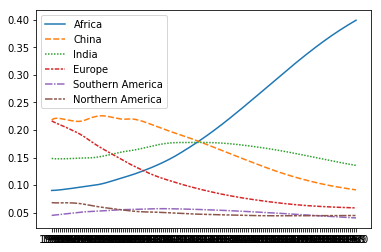

In [11]:
plot = sns.lineplot(data=a)

In [12]:
fig = plot.get_figure()
plot.set_ylabel('Fraction of World Population')
plot.set_xlabel('Year')

labels = plot.get_xticklabels()
for ax in fig.axes:
    labels = plot.get_xticklabels()
    for i,l in enumerate(labels):
        if(i%10 !=0) : labels[i] = ''
plot.set_xticklabels(labels, rotation=-30, fontsize=8)

vals = plot.get_yticks()
plot.set_yticklabels(['{:.0%}'.format(x) for x in vals], fontsize=8)


[Text(0, 0.0, '0%'),
 Text(0, 0.05, '5%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.15000000000000002, '15%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.25, '25%'),
 Text(0, 0.30000000000000004, '30%'),
 Text(0, 0.35000000000000003, '35%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.45, '45%')]

### Export figure as png file

In [13]:
fig.savefig('frac.png', dpi=400)

### Final Outputs
- UN WPP excel file
- pops.csv for R plotting
- frac.png with the line plot